# CPA01 - Data Analysis of Global Power Plants
This notebook uses the Global Power Plant Database that contains data of power plants around the world. The database contains about 35,000 power plants in 167 countries.
* [Global Power Plant Database](https://datasets.wri.org/dataset/globalpowerplantdatabase) (Source: World Resources Institute)

Here are some questions I'm trying to answer using the dataset:
* How many power plants does the US have?
* Which countries have the most power plants? What kinds of primary fuels do they use?
* Which countries have the highest total electrical generating capacity?
* What are the most common primary fuels around the world?
* Which power plants are in the high latitudes?

##### Note: The answers (analysis) will be marked in bold after each plot/chart/pivot table.

&emsp;

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Read the Data Into a Data Frame

In [2]:
# set low_memory to False to deal with DtypeWarning
df = pd.read_csv("data/global_power_plant_database.csv", low_memory = False)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


## Data Exploration

#### Rough Overview

In [3]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


#### Columns in the Dataset

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

##### Above is the variable names (column names) of the dataset.

#### Rows in the Dataset

In [5]:
len(df.index)

34936

##### There are 34936 power plants in the world included in the dataset.

#### Countries Included in the Dataset

List of countries:

In [6]:
country_long = df["country_long"].unique()
country_long

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Cote DIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ira

##### Above are all countries included in the dataset.

In [7]:
len(country_long)

167

##### There are 167 countries included in the dataset.

#### Types of Primary Fuels

In [8]:
primary_fuel = df["primary_fuel"].unique()
primary_fuel

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

##### Above are the types of primary fuels of power plants around the world.

## Answers to the questions
* How many power plants does the US have?

In [9]:
df_usa = df[df["country"] == "USA"]
df_usa

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
24710,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,3.25,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24711,USA,United States of America,1025 Traveller Solar LLC,USA0062660,5.0,35.4273,-79.1263,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,8.14,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24712,USA,United States of America,1047 Little Mountain Solar LLC,USA0062661,3.0,36.1971,-80.8067,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,4.88,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
24713,USA,United States of America,12 Applegate Solar LLC,USA0059371,1.9,40.2003,-74.5761,Solar,NaN,NaN,...,2.92,2.94,3.06,2.85,2.61,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
24714,USA,United States of America,126 Grove Solar LLC,USA0060858,2.0,42.0761,-71.4227,Solar,NaN,NaN,...,3.01,2.98,3.11,2.98,2.64,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1,SOLAR-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34538,USA,United States of America,Zion Landfill Gas to Energy Facility,USA0056871,7.0,42.4803,-87.8861,Waste,NaN,NaN,...,NaN,NaN,NaN,NaN,1.26,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34539,USA,United States of America,Zorn,USA0001368,18.0,38.2803,-85.7023,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,63.47,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34540,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,8.31,8.46,6.57,6.52,6.81,WIND-V1,WIND-V1,WIND-V1,WIND-V1,WIND-V1
34541,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,1.62,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


##### Above is data with power plants in the US only.

In [10]:
len(df_usa.index)

9833

##### There are 9833 power plants in the US.

* Which countries have the most power plants? What kinds of primary fuels do they use?

Text(0, 0.5, 'Country')

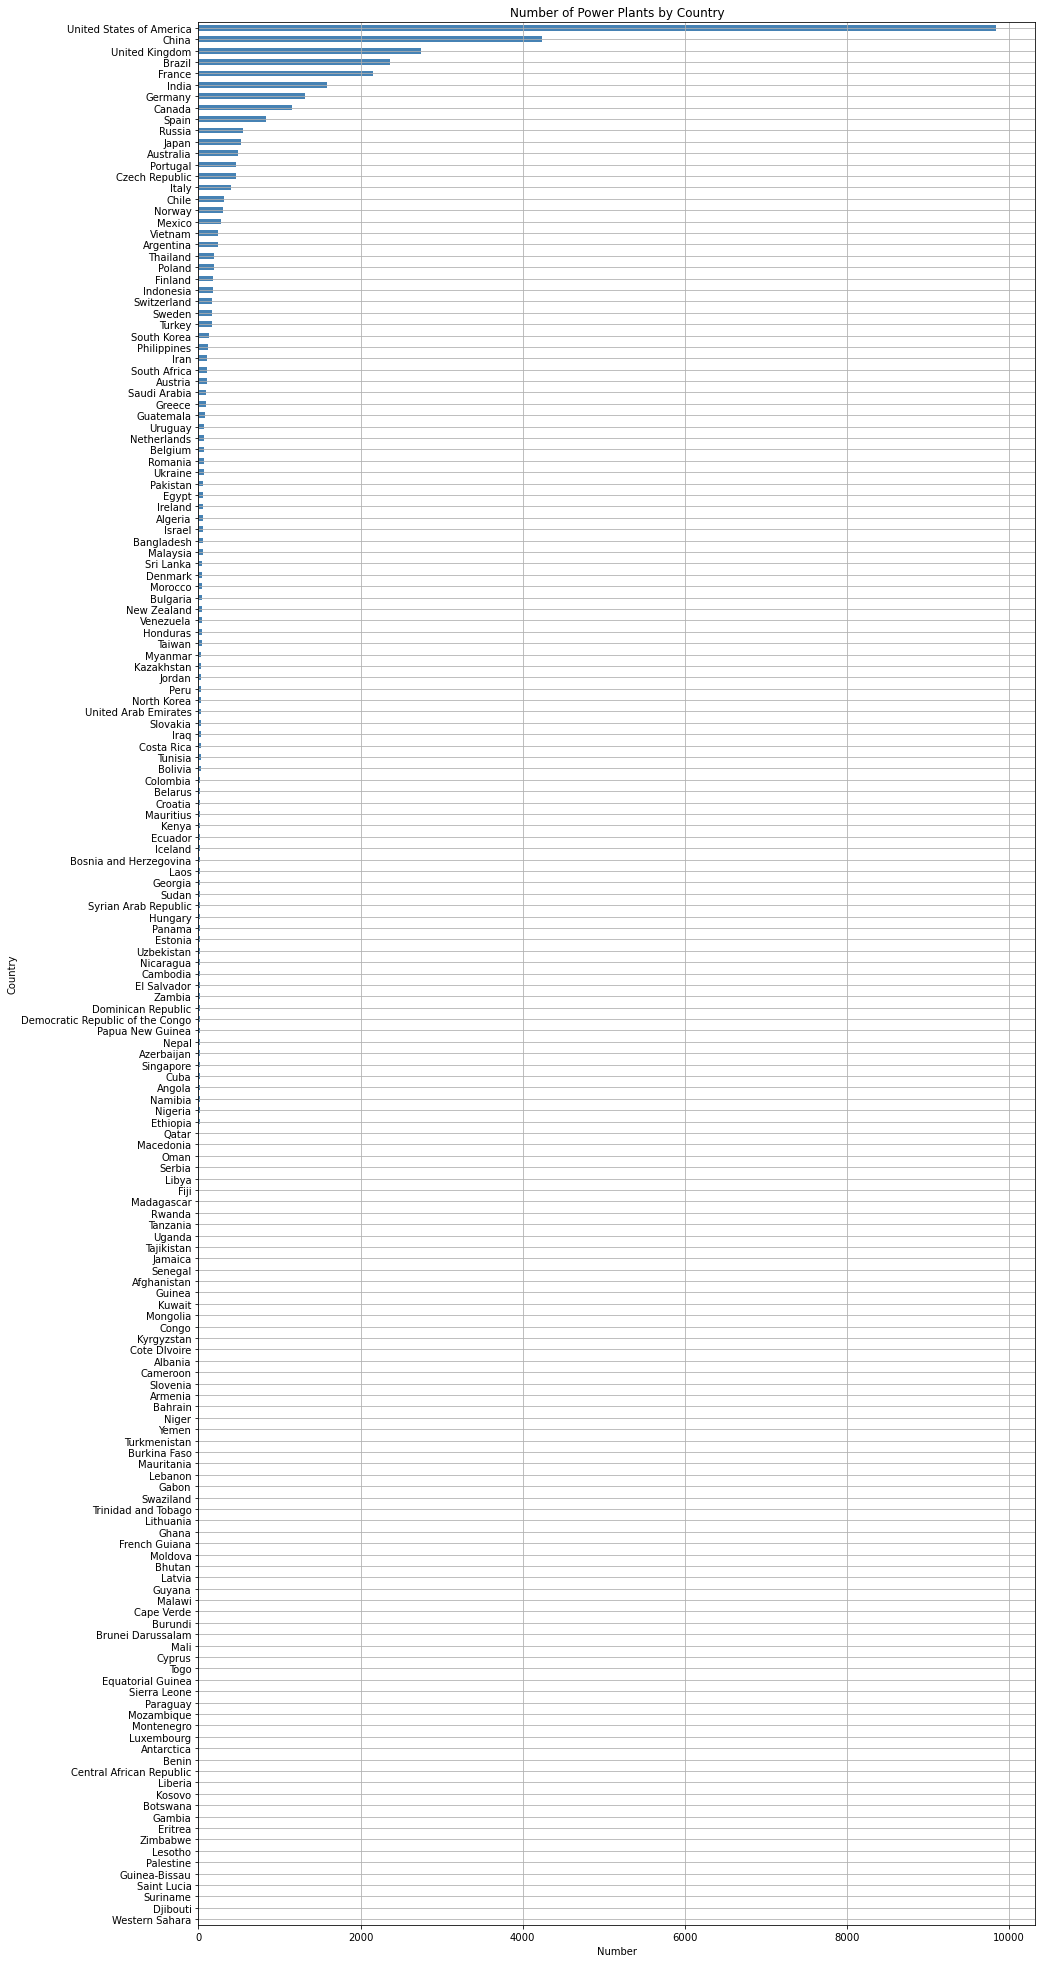

In [11]:
country_pp = df.groupby("country_long").size()
country_pp.sort_values().plot.barh(figsize = (15,35), color = "steelblue")
plt.grid()
plt.title("Number of Power Plants by Country")
plt.xlabel("Number")
plt.ylabel("Country")

In [12]:
country_pp.sort_values(ascending = False).head(5)

country_long
United States of America    9833
China                       4235
United Kingdom              2751
Brazil                      2360
France                      2155
dtype: int64

##### Above are the top 5 countries having the most power plants. The US has 9,833, China has 4,235, the UK has 2,751, Brazil has 2,360, and France has 2,155 power plants.

In [13]:
# use fill_value = 0 to get rid of NaNs
df_top5 = df[df["country_long"].isin(["United States of America", "China", "United Kingdom", "Brazil", "France"])].copy()
pivot = pd.pivot_table(df_top5, values = ["gppd_idnr"], index = ["primary_fuel"],
                       columns = ["country_long"], aggfunc = "count", fill_value = 0)
pivot

gppd_idnr                                                     
country_long      Brazil China France United Kingdom United States of America
primary_fuel                                                                 
Biomass              444     0    148            226                      153
Coal                  19   946      5              8                      286
Cogeneration           0     0      0              7                       34
Gas                  118   170      9             55                     1818
Geothermal             0     2      1              0                       65
Hydro                701   947    429            119                     1449
Nuclear                2    12     19              8                       58
Oil                  627     5      5             11                      876
Other                  1     0      0              0                       16
Petcoke                0     0      0              0                       11
Solar                 24  1318    817           1170                     3283
Storage                0     0      0             31                      104
Waste                 12     0      0            329                      541
Wave and Tidal         0     0      1              7                        0
Wind                 412   835    721            780                     1139

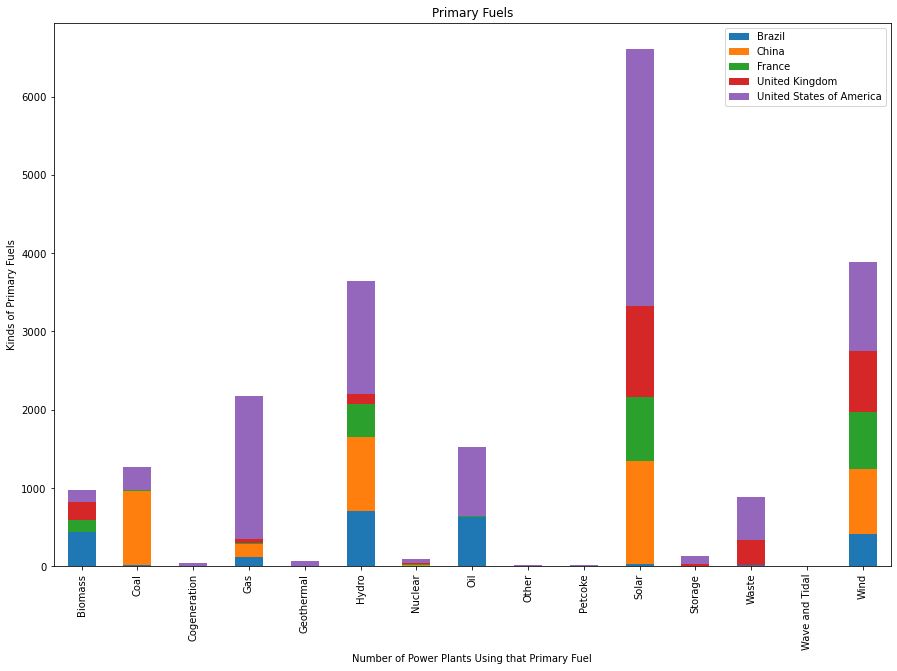

In [14]:
pivot.plot.bar(figsize = (15,10), stacked = True)
plt.title("Primary Fuels")
plt.xlabel("Number of Power Plants Using that Primary Fuel")
plt.ylabel("Kinds of Primary Fuels")
plt.legend(["Brazil", "China", "France", "United Kingdom", "United States of America"])

##### Above are the pivot table and the stack bar chart showing the energy source used in primary electricity generation in the top 5 countries. Solar, gas, hydro, wind, and oill are some fuels used the most within them.

* Which countries have the highest total electrical generating capacity?

Text(0, 0.5, 'Country')

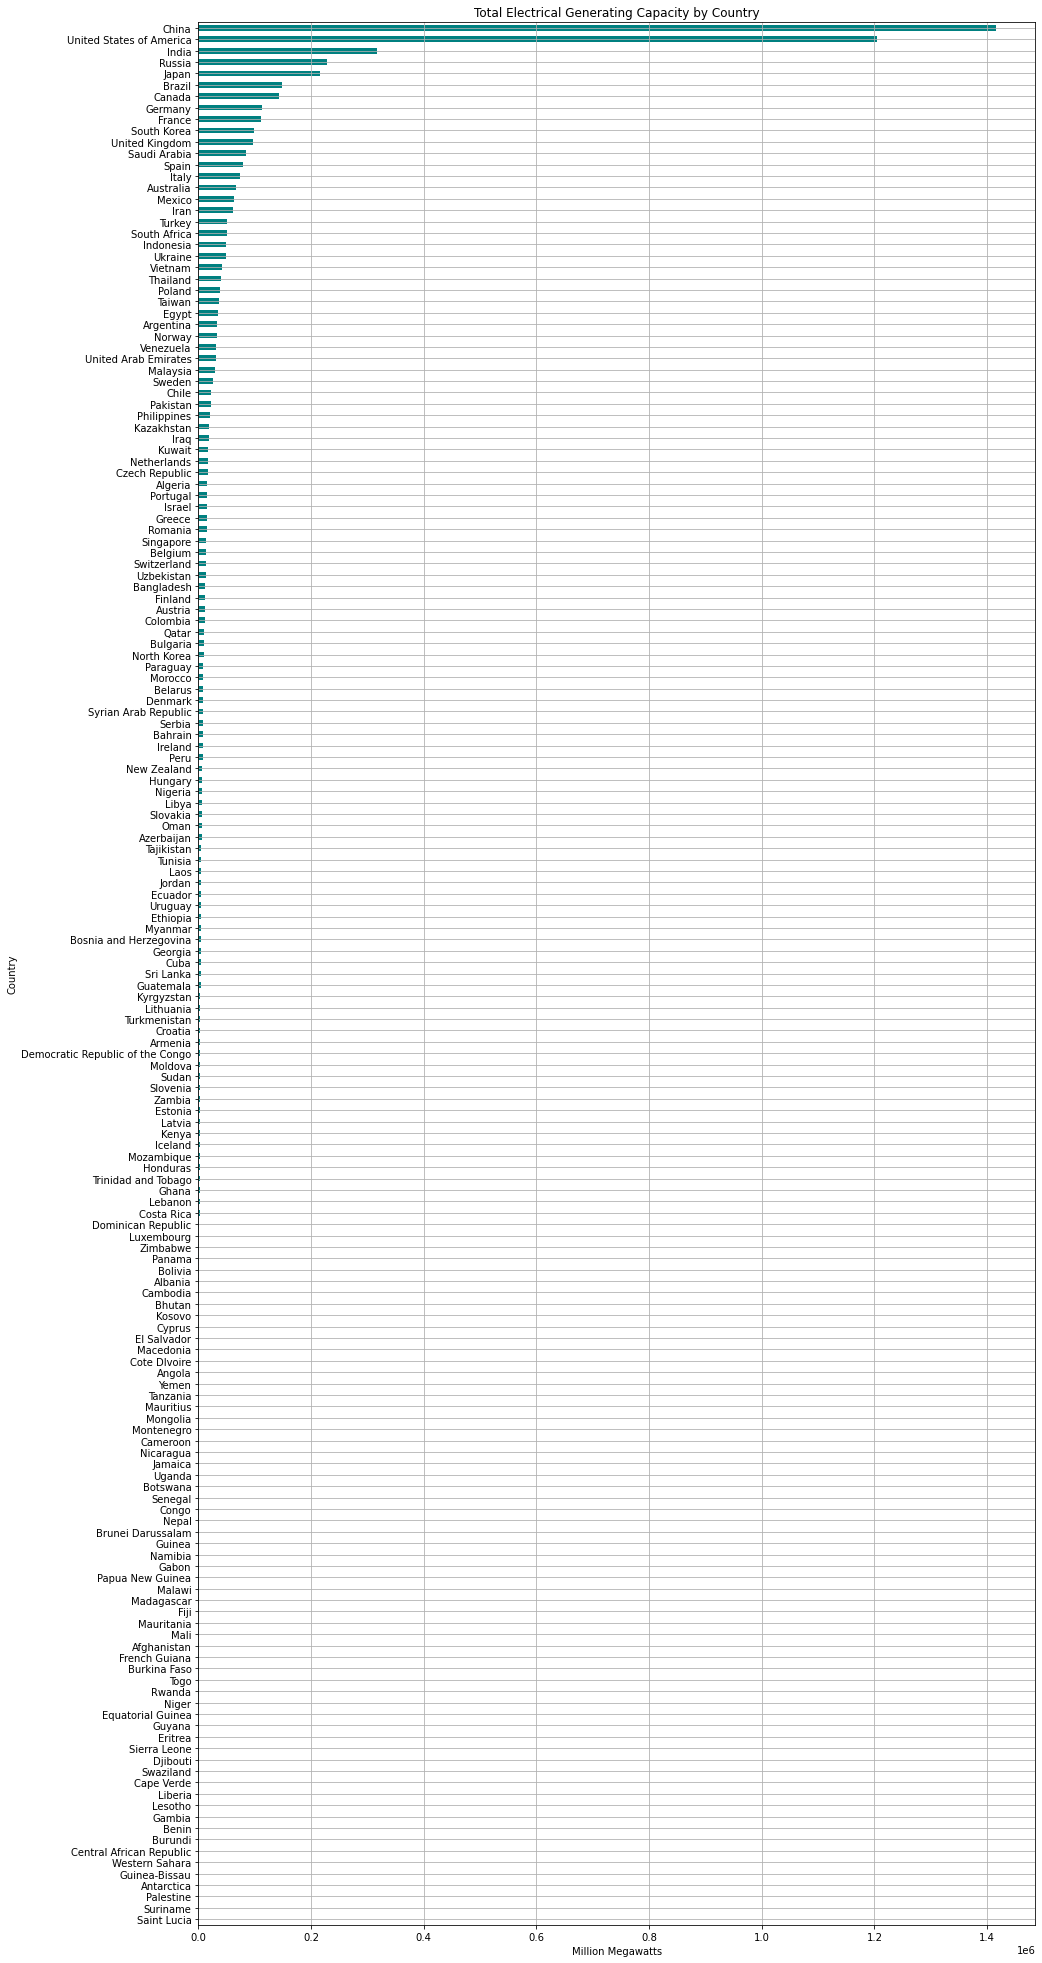

In [15]:
country_ca = df.groupby("country_long")["capacity_mw"].agg(sum)
country_ca.sort_values().plot.barh(figsize = (15,35), color = "teal")
plt.grid()
plt.title("Total Electrical Generating Capacity by Country")
plt.xlabel("Million Megawatts")
plt.ylabel("Country")

In [16]:
country_ca.sort_values(ascending = False).head(5)

country_long
China                       1415067.380
United States of America    1204638.050
India                        316088.546
Russia                       228220.050
Japan                        215365.850
Name: capacity_mw, dtype: float64

##### Above are the top 5 countries having the highest total electrical generating capacity. China and the US still top the chart. While not being the top 5 countries having the most power plants, India, Russia, and Japan have fairly high total electrical generating capacities in the world.

* What are the most common primary fuels around the world?

Text(0, 0.5, 'Number of Power Plants')

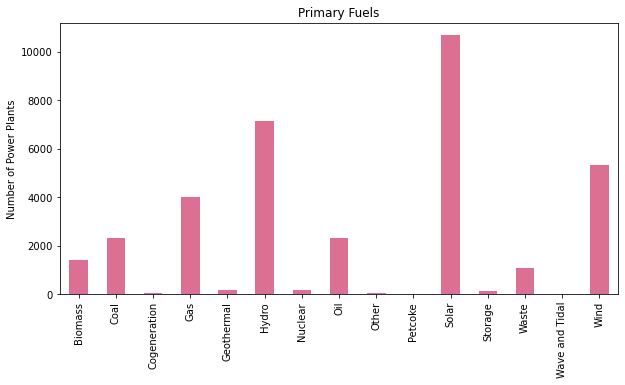

In [17]:
fuels = df.groupby("primary_fuel").size()
fuels.plot.bar(figsize = (10,5),color = "palevioletred")
plt.title("Primary Fuels")
plt.xlabel("")
plt.ylabel("Number of Power Plants")

In [18]:
fuels.sort_values(ascending = False)

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
dtype: int64

##### According to the results, the 2 most common kinds of primary fuels are solar and hydro, which are used by 10,665 and 7,156 power plants around the world.

* Which power plants are in the high latitudes?

In [19]:
lat = df[["country_long", "name", "latitude"]]
lat.sort_values(ascending = False, by = "latitude", key = abs).head(10)

,country_long,name,latitude
90,Antarctica,McMurdo Station Generator,-77.8470
91,Antarctica,Ross Island,-77.8428
25353,United States of America,Barrow,71.2920
17985,Norway,Havoygavlen,71.0109
18036,Norway,Kjollefjord,70.9217
18078,Norway,Melkoya,70.6840
30566,United States of America,NSB Wainwright Utility,70.6429
30561,United States of America,NSB Atqasuk Utility,70.4826
17867,Norway,Adamselv,70.3720
33209,United States of America,TNSG North Plant,70.2353


##### Above are the top 10 power plants around the world in the high latitudes. They're all in Antarctica, Norway, and the US.